In [1]:
#Import libraries
from obspy import read
import matplotlib.pyplot as plt
import time
import glob
import numpy as np
import pandas as pd
import math
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Pre-processing

In [2]:
path = '/Users/rachelconnor/Desktop/MDS Project/2c.BIT06/goodRF_crust2'
#Make list of all RFs in folder
pathList = sorted(glob.glob(path + '/*.PICKLE'))

In [3]:
#Read in the first stream
st = read(pathList[0], format = 'PICKLE')

In [4]:
print(type(st))
print(st)

<class 'obspy.core.stream.Stream'>
3 Trace(s) in Stream:
2C.BIT06..HHZ | 2018-12-28T13:03:33.090000Z - 2018-12-28T13:33:33.040000Z | 20.0 Hz, 36000 samples
2C.BIT06..BHR | 2018-12-28T13:03:33.090000Z - 2018-12-28T13:33:33.040000Z | 20.0 Hz, 36000 samples
2C.BIT06..BHT | 2018-12-28T13:03:33.090000Z - 2018-12-28T13:33:33.040000Z | 20.0 Hz, 36000 samples


In [5]:
#Extract first trace in stream
tr1 = st[0]

In [6]:
#Get BAZ and distance
statstr1 = print(tr1.stats.baz, "|", tr1.stats.dist)

7.652045638261598 | 71.6718291934481


In [7]:
#For loop to extract a list of BAZ and distance for the reciever functions 
#Empy lists
Dists = []
BAZs = []
n = 0
for reciever in pathList:
    stream = read(pathList[n], format = "PICKLE")
    trace = stream[0]
    BAZs.append(trace.stats.baz)
    Dists.append(trace.stats.dist)
    n = n+1


In [8]:
print(Dists)
print(BAZs)

[71.6718291934481, 75.04113685867561, 83.7273387942292, 58.34998749457671, 56.680257351588835, 43.37113411852291, 36.592917855039, 32.492593786071374, 88.43078165207618, 81.28151494814382, 55.333820622893455, 77.68956728110595, 68.51522228364543, 67.90952123204826, 49.04481335084993, 59.915755710476944, 60.97714687995854]
[7.652045638261598, 12.109605221800535, 26.471115169572357, 63.32631019180084, 68.12736533635511, 96.37133003912462, 105.08959683682616, 114.12273411739278, 228.71646152263233, 230.49773552920783, 235.6323247647638, 237.79901331802836, 259.50005722249097, 262.22425640603444, 330.2036913045764, 356.5377625824374, 356.0935698942039]


In [9]:
#Make them into a datafram
Data = pd.DataFrame(
    {'BAZ': BAZs,
     'Distance': Dists
    })
#Turn it into the csv file
Data.to_csv('DraftSumm.csv', sep='\t', index=False)
#Read it with panda and remove unwanted columns to begin analysis
df = pd.read_csv('DraftSumm.csv', sep='\t', index_col=False)
if 'Unnamed: 0' in df.columns:
    df.drop('Unnamed: 0', axis=1, inplace=True)
df

,BAZ,Distance
0,7.652046,71.671829
1,12.109605,75.041137
2,26.471115,83.727339
3,63.326310,58.349987
4,68.127365,56.680257
5,96.371330,43.371134
6,105.089597,36.592918
7,114.122734,32.492594
8,228.716462,88.430782
9,230.497736,81.281515


# K-Means Clustering

In [10]:
#To do basic k-means clustering
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [12]:
#Need to scale data
stdScaler = StandardScaler()

scaledDf = stdScaler.fit_transform(df.to_numpy())
scaledDf = pd.DataFrame(scaledDf, columns = ['BAZ', 'Distance'])

print("Scaled Dataset Using StandardScaler:")
scaledDf

Scaled Dataset Using StandardScaler:


,BAZ,Distance
0,-1.435904,0.563763
1,-1.397863,0.777054
2,-1.275303,1.326927
3,-0.960784,-0.279564
4,-0.919812,-0.385265
5,-0.678780,-1.227788
6,-0.604379,-1.656877
7,-0.527291,-1.916444
8,0.450644,1.624674
9,0.465845,1.172096


## No. Cluster Selection

In [13]:
#Cluster Selection using Inertia Method and Silhouette Method
#Inertia Attribute
SSE = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters =k)
    km = km.fit(scaledDf)
    SSE.append(km.inertia_)

/Users/rachelconnor/opt/anaconda3/envs/Project/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/rachelconnor/opt/anaconda3/envs/Project/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/rachelconnor/opt/anaconda3/envs/Project/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/rachelconnor/opt/anaconda3/envs/Project/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set th

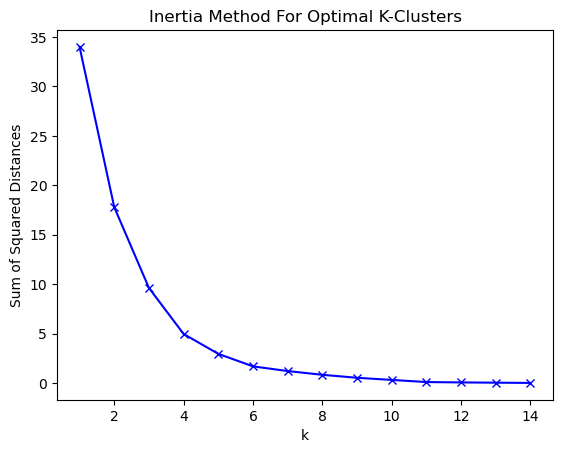

In [14]:
plt.plot(K, SSE, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of Squared Distances')
plt.title('Inertia Method For Optimal K-Clusters')
plt.show()

In [15]:
#Different Method
kmeans_kwargs = {
    "init":"random",
    "n_init": 10,
    "max_iter": 300
}

#A list holds the SSE values for each k
sse = []
for k in range (1,15):
    kmeans = KMeans(n_clusters = k, **kmeans_kwargs)
    kmeans.fit(scaledDf)
    sse.append(kmeans.inertia_)

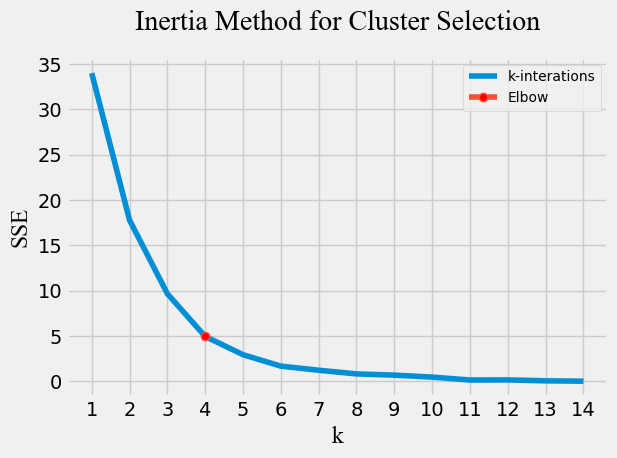

In [40]:
#marker to highlight "elbow"
x = [4]
y = [5]
#plot
plt.style.use("fivethirtyeight")
plt.plot(range(1,15), sse)
plt.xticks(range(1,15))
plt.plot(x,y, marker = "o", markersize = 6, markerfacecolor='red')
plt.title("Inertia Method for Cluster Selection", fontname='Times New Roman', pad = 20)
plt.xlabel("k", fontname = 'Times New Roman')
plt.ylabel("SSE", fontname = 'Times New Roman')
plt.legend(['k-interations', 'Elbow'], loc = "upper right", prop = {'size': 10})
plt.tight_layout()

#save
#plt.savefig('Sample k-means inertia')

plt.show()

In [34]:
#Can use package to identify elbow point programmatically
kl = KneeLocator(range(1,15), sse, curve = "convex",
                direction = "decreasing")
kl.elbow

4

In [41]:
#No. Clusters via silhouette Measure
#Instead of computing SSE we are computing silhouette coefficient
silCo = []

#need to start at 2 clusters for silhouette coefficient
for k in range(2,15):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaledDf)
    score = silhouette_score(scaledDf, kmeans.labels_)
    silCo.append(score)

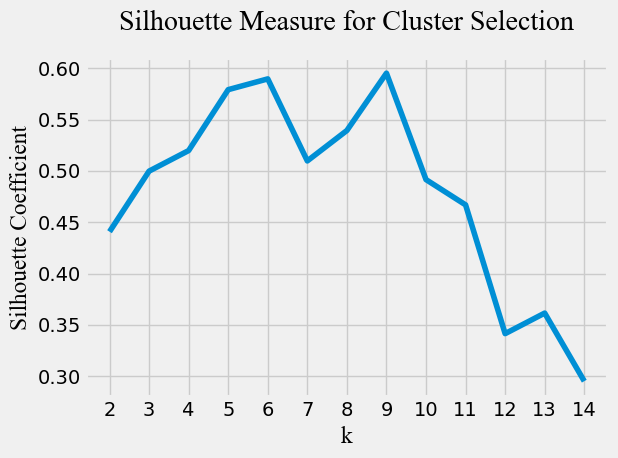

In [44]:
plt.style.use("fivethirtyeight")
plt.plot(range(2,15), silCo)
plt.xticks(range(2,15))
plt.title('Silhouette Measure for Cluster Selection', fontname = 'Times New Roman', pad=20)
plt.xlabel("k", fontname = 'Times New Roman')
plt.ylabel("Silhouette Coefficient", fontname = 'Times New Roman')
plt.tight_layout()

#Save
plt.savefig('Sample k-means silhouette')

plt.show()

## K-Means Application

In [45]:
#Apply with k = 4
kmeansModel = KMeans(n_clusters = 4)
kmeansModel.fit(scaledDf)

/Users/rachelconnor/opt/anaconda3/envs/Project/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [46]:
df['Clusters'] = kmeansModel.labels_
df.head

<bound method NDFrame.head of            BAZ   Distance  Clusters
0     7.652046  71.671829         0
1    12.109605  75.041137         0
2    26.471115  83.727339         0
3    63.326310  58.349987         0
4    68.127365  56.680257         0
5    96.371330  43.371134         2
6   105.089597  36.592918         2
7   114.122734  32.492594         2
8   228.716462  88.430782         3
9   230.497736  81.281515         3
10  235.632325  55.333821         1
11  237.799013  77.689567         3
12  259.500057  68.515222         3
13  262.224256  67.909521         3
14  330.203691  49.044813         1
15  356.537763  59.915756         1
16  356.093570  60.977147         1>

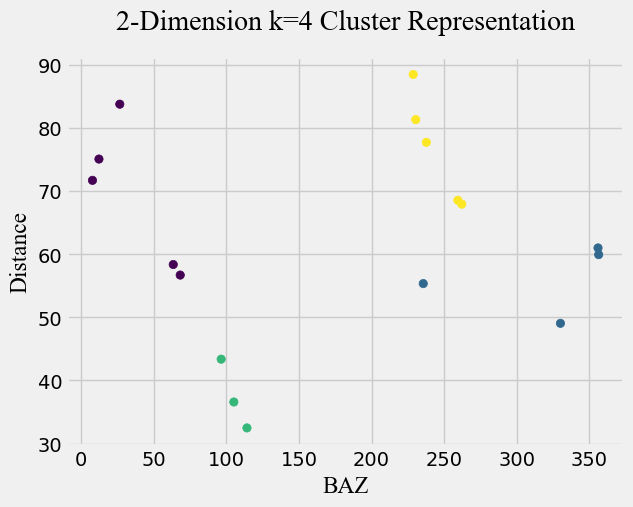

In [48]:
#Try visualise
plt.scatter(df["BAZ"],
           df["Distance"],
           c = df["Clusters"])
plt.scatter
plt.title('2-Dimension k=4 Cluster Representation', fontname = 'Times New Roman', pad=20)
plt.xlabel("BAZ", fontname = 'Times New Roman')
plt.ylabel("Distance", fontname = 'Times New Roman')
plt.show()

In [ ]:
#How many in each cluster
df['Clusters'].value_counts()

## K-Means using Manual No. Clusters

In [ ]:
#Apply with k = 2
kmeansManual = KMeans(n_clusters = 2)
kmeansManual.fit(scaledDf)

In [ ]:
df['Two Clusters'] = kmeansManual.labels_
df.head

In [ ]:
#Try visualise
plt.scatter(df["BAZ"],
           df["Distance"],
           c = df["Two Clusters"])
plt.title('2-Dimensional K=2 Cluster Representaiton')
plt.xlabel("BAZ")
plt.ylabel("Distance")
plt.show()

In [ ]:
#How many in each cluster
df['Two Clusters'].value_counts()

# Visuals - All RFs, manual clusters Vs. 4-Cluster Vs. 2-Cluster

In [ ]:
filt = 'crust2'
#Final all Manual cluster folds
BAZ_subfolds = sorted(glob.glob(path + '/BAZ_*_*'))
print('Manual Clustering Folders:', '\n')
print(BAZ_subfolds)
#Find all K=4 Subfolders that exist
KMeans_subfolds = sorted(glob.glob(path + '/KMean_*'))
#Find all K=2 Subfolders that exist
K2_subfolds = sorted(glob.glob(path + '/K2_*'))
print('Manual Clustering Folders:', BAZ_subfolds, '\n ___________________________________',
      '\K=4 Clustering Folders:\n', KMeans_subfolds, '\n ___________________________________',
     '\nK=2 Clustering Folders: \n', K2_subfolders)

In [ ]:
flag = 'SV'
#Define limits of time axis to plot
xlimits = [-2,15]
#Show figure?
showfig = True
#Save Figure?
savefig = False

In [ ]:
#List of all RFs for this crust
stalist = sorted(glob.glob(path + '/*.PICKLE'))
stalist

In [ ]:
#Set up Figure
plt.style.use('default')
fig = plt.figure(figsize = (6,10))
#First subplot
plt.subplot(121)

In [ ]:
#Empty plotting lists
plotBazs = []
plotDists = []
#Set counter to 0
c = 0

In [ ]:
#Plot all RFs
#Loop through all RFs in list
for i in range(len(stalist)):
    #Find file name
    fileName = stalist[i].split('/')[-1]
    #Read in file
    seis = read(stalist[i], format = 'PICKLE')
    
    #Extract earthquake info
    distdg = seis[0].stats['dist']
    BAZ = seis[0].stats['baz']
    
    try:
        #extract RF
        RF = getattr(seis[0],filt)['iterativedeconvolution']
    except:
        print('no RF', filt, statlist[i])
        continue
    
    #add to counter to determine place to plot RF on y axis
    c = c+0.5
    
    #Extract time
    time = getattr(seis[0],filt)['time']
    
    #identify time of max amplitude - allign with 0
    maxtime = time[np.argmax(RF)]
    
    #add current info to the lists
    plotBazs.append(BAZ)
    plotDists.append(distdg)
    
    #plot RF at current y position
    plt.plot(time-maxtime, RF/np.max(np.abs(RF))+c, 'k')
    #plot RF in grey to overlay of all data
    plt.plot(time-maxtime, RF/np.max(np.abs(RF)), '-', color = 'grey')

#Label subplot 1 and define the axis
plt.title('All Reciever Functions')
plt.ylabel('BAZ')
#Detailed label
plt.yticks(np.asarray(np.arange(0,c+0.5,0.5)), ['ALL']+[str(math.floor(x)) for x in plotBazs])
plt.xlabel('Time')
plt.xlim(xlimits)
plt.ylim([-2,c+2])

In [ ]:
#Manually Clustered
c=0
stackstart = 0
yticks = []
plotBazs2 = []
plotDists2 = []

for bazfold in BAZ_subfolds:
    
    stalist = sorted(glob.glob(bazfold + '/*.PICKLE'))
    
    for i in range(len(stalist)):
        
        filename = stalist[i].split('/')[-1]
        seis = read(stalist[i],format='PICKLE')
        
        distdg = seis[0].stats['dist']
        BAZ=seis[0].stats['baz']
        
        try:
            RF = getattr(seis[0],filt)['iterativedeconvolution']
        except:
            print('no RF', filt, stalist[i])
            continue
        c=c+0.5
        
        time=getattr(seis[0],filt)['time']
        
        maxtime=time[np.argmax(RF)]
        plotBazs2.append(BAZ)
        yticks.append(c)
        plt.plot(time-maxtime, RF/np.max(np.abs(RF))+c, 'k')
        plt.plot(time-maxtime, RF/np.max(np.abs(RF))+stackstart,'-',color='grey')
        plotDists2.append(distdg)
    c=c+2
    stackstart=c
    
#label and define axis Subplot2
plt.title('Manual Clustering Results')
plt.yticks(np.asarray(yticks),[str(math.floor(x)) for x in plotBazs2])
plt.xlabel('Time')
plt.ylabel('BAZ')
plt.xlim(xlimits)
plt.ylim([-2,c+2])


In [ ]:
#KMeans Clustering 
c = 0
stackstart=0
yticksMeans = []
bazsMeans = []
distsMeans = []

for kfold in KMeans_subfolds:
    
    stalist = sorted(glob.glob(kfold + '/*.PICKLE copy'))
    
    for i in range(len(stalist)):
        filename = stalist[i].split('/')[-1]
        seis = read(stalist[i],format = 'PICKLE')
        
        distdg = seis[0].stats['dist']
        BAZ=seis[0].stats['baz']
        
        try:
            RF = getattr(seis[0],filt)['iterativedeconvolution']
        except:
            print('no RF', filt, stalist[i])
            continue
        c=c+0.5
        
        time=getattr(seis[0],filt)['time']
        
        maxtime=time[np.argmax(RF)]
        bazsMeans.append(BAZ)
        yticksMeans.append(c)
        plt.plot(time-maxtime, RF/np.max(np.abs(RF))+c, 'k')
        plt.plot(time-maxtime, RF/np.max(np.abs(RF))+stackstart,'-',color='grey')
        distsMeans.append(distdg)
    c=c+2
    stackstart = c

#Label + define axis
plt.title('KMeans Clustering Results')
plt.yticks(np.asarray(yticksMeans), [str(math.floor(x)) for x in bazsMeans])
plt.xlabel('Time')
plt.ylabel('BAZ')
plt.xlim(xlimits)
plt.ylim([-2,c+2])

In [ ]:
#Play with the distances
#KMeans Clustering 
c = 0
stackstart=0
yticksMeans2 = []
bazsMeans2 = []
distsMeans2 = []

for kfold in KMeans_subfolds:
    
    stalist = sorted(glob.glob(kfold + '/*.PICKLE copy'))
    
    for i in range(len(stalist)):
        filename = stalist[i].split('/')[-1]
        seis = read(stalist[i],format = 'PICKLE')
        
        distdg = seis[0].stats['dist']
        BAZ=seis[0].stats['baz']
        
        try:
            RF = getattr(seis[0],filt)['iterativedeconvolution']
        except:
            print('no RF', filt, stalist[i])
            continue
        c=c+1
        
        time=getattr(seis[0],filt)['time']
        
        maxtime=time[np.argmax(RF)]
        bazsMeans2.append(BAZ)
        yticksMeans2.append(c)
        plt.plot(time-maxtime, RF/np.max(np.abs(RF))+c, 'k')
        plt.plot(time-maxtime, RF/np.max(np.abs(RF))+stackstart,'-',color='grey')
        distsMeans2.append(distdg)
    c=c+3
    stackstart = c

#Label + define axis
plt.title('KMeans Clustering Results')
plt.yticks(np.asarray(yticksMeans2), [str(math.floor(x)) for x in bazsMeans2])
plt.xlabel('Time')
plt.ylabel('BAZ')
plt.xlim(xlimits)
plt.ylim([-2,c+2])

In [ ]:
#Show clustering for K=2
c=0
stackstart=0
k2yticks = []
k2Bazs = []
k2Dists = []

for k2fold in K2_subfolds:
    stalist = sorted(glob.glob(k2fold + '/*.PICKLE copy'))
    
    for i in range(len(stalist)):
        
        filename = stalist[i].split('/')[-1]
        seis = read(stalist[i], format = 'PICKLE')
        
        distdg = seis[0].stats['dist']
        BAZ=seis[0].stats['baz']
        
        try:
            RF = getattr(seis[0],filt)['iterativedeconvolution']
        except:
            print('no RF', filt, stalist[i])
            continue
        c=c+0.5
        
        time = getattr(seis[0],filt)['time']
        
        maxtime=time[np.argmax(RF)]
        k2Bazs.append(BAZ)
        k2yticks.append(c)
        plt.plot(time-maxtime, RF/np.max(np.abs(RF))+c, 'k')
        plt.plot(time-maxtime, RF/np.max(np.abs(RF))+stackstart, '-', color = 'grey')
        k2Dists.append(distdg)
    c=c+2
    stackstart=c

#Label + define axis
plt.title('K=2 Cluster Results')
plt.yticks(np.asarray(k2yticks), [str(math.floor(x)) for x in k2Bazs])
plt.xlabel('Time')
plt.ylabel('BAZ')
plt.xlim(xlimits)
plt.ylim([-2,c+2])

# Pipelines

In [ ]:
#Follow RealPython Application
#Making a clustering pipeline
clusterer = Pipeline([
    (
    "kmeans",
    KMeans(
    n_clusters = 4,
    init = "k-means++",
    n_init = 50,
    max_iter = 500,
    random_state = 42,
    ),
    ),
])

In [ ]:
clusterer.fit(scaledDf)